# Import 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
from tqdm import tqdm 

In [2]:
# !unzip export.zip

In [6]:
import xml.etree.ElementTree as ET
import datetime as dt

# plt.style.use("fivethirtyeight")

# create element tree object
tree = ET.parse('apple_health_export/export.xml') 
root = tree.getroot()  
# for every health record, extract the attributes

In [7]:
tags = set()
for element in root.iter():
    tags.add(element.tag)

In [86]:
tags

{'ActivitySummary',
 'ExportDate',
 'HealthData',
 'HeartRateVariabilityMetadataList',
 'InstantaneousBeatsPerMinute',
 'Me',
 'MetadataEntry',
 'Record',
 'Workout',
 'WorkoutEvent',
 'WorkoutStatistics'}

In [9]:
def format_with_separator(number):
    """
    Format a number with thousands separator.
    """
    return "{:,}".format(number)

rows = 0
column1 = "Tag"
column2 = "Number of Rows"

# Header
header = f"{column1:<40} {column2:>40}"  # Aligning the second column to the right
separator = "-" * 80

# Data rows
data_rows = []

for tag in tags:
    tag_rows = len([x.attrib for x in root.iter(tag)])
    rows += tag_rows
    formatted_tag_rows = format_with_separator(tag_rows)
    data_rows.append(f"{tag:<40} {formatted_tag_rows:>40}")  # Aligning the second column to the right

# Print
print(header)
print(separator)
print("\n".join(data_rows))
print(separator)
formatted_total_rows = format_with_separator(rows)
print(f"Total number of rows : {formatted_total_rows:>55}")  # Aligning the total number of rows on the right


Tag                                                                Number of Rows
--------------------------------------------------------------------------------
WorkoutStatistics                                                           1,091
ExportDate                                                                      1
ActivitySummary                                                               577
HealthData                                                                      1
Workout                                                                       277
WorkoutEvent                                                                6,183
HeartRateVariabilityMetadataList                                            6,056
MetadataEntry                                                             501,014
InstantaneousBeatsPerMinute                                               307,870
Me                                                                              1
Record           

In [94]:
for tag in tags:
    data=[x.attrib for x in root.iter(tag)]
    print(tag)
    display(pd.DataFrame(data).tail())

HealthData


,locale
0,en_US@rg=frzzzz


Me


,HKCharacteristicTypeIdentifierDateOfBirth,HKCharacteristicTypeIdentifierBiologicalSex,HKCharacteristicTypeIdentifierBloodType,HKCharacteristicTypeIdentifierFitzpatrickSkinType,HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse
0,1996-03-21,HKBiologicalSexMale,HKBloodTypeNotSet,HKFitzpatrickSkinTypeNotSet,None


WorkoutStatistics


,type,startDate,endDate,average,minimum,maximum,unit,sum
1086,HKQuantityTypeIdentifierHeartRate,2024-04-20 14:54:29 +0200,2024-04-20 15:56:32 +0200,100.95,75,120,count/min,NaN
1087,HKQuantityTypeIdentifierBasalEnergyBurned,2024-04-20 14:54:29 +0200,2024-04-20 15:56:32 +0200,NaN,NaN,NaN,kcal,102.189
1088,HKQuantityTypeIdentifierActiveEnergyBurned,2024-04-24 17:33:22 +0200,2024-04-24 18:22:43 +0200,NaN,NaN,NaN,kcal,205.105
1089,HKQuantityTypeIdentifierHeartRate,2024-04-24 17:33:22 +0200,2024-04-24 18:22:43 +0200,92.454,66,120,count/min,NaN
1090,HKQuantityTypeIdentifierBasalEnergyBurned,2024-04-24 17:33:22 +0200,2024-04-24 18:22:43 +0200,NaN,NaN,NaN,kcal,79.9714


HeartRateVariabilityMetadataList


""
6051
6052
6053
6054
6055


InstantaneousBeatsPerMinute


,bpm,time
307865,56,"19:02:09,06"
307866,59,"19:02:10,08"
307867,57,"19:02:11,12"
307868,52,"19:02:12,28"
307869,58,"19:02:13,30"


Record


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
1047523,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 11:22:00 +0200,2024-04-25 11:20:59 +0200,2024-04-25 11:21:58 +0200,79.5661,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."
1047524,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 13:05:59 +0200,2024-04-25 13:04:59 +0200,2024-04-25 13:05:55 +0200,59.9736,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."
1047525,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 17:21:29 +0200,2024-04-25 17:20:28 +0200,2024-04-25 17:21:28 +0200,53.493,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."
1047526,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 17:22:34 +0200,2024-04-25 17:21:33 +0200,2024-04-25 17:22:33 +0200,56.949,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."
1047527,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 19:02:14 +0200,2024-04-25 19:01:13 +0200,2024-04-25 19:02:13 +0200,60.3981,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."


WorkoutEvent


,type,date,duration,durationUnit
6178,HKWorkoutEventTypeSegment,2024-03-29 20:36:50 +0200,16.15976285338402,min
6179,HKWorkoutEventTypeSegment,2024-03-29 20:52:59 +0200,2.135550890366237,min
6180,HKWorkoutEventTypePause,2024-04-08 14:49:38 +0200,NaN,NaN
6181,HKWorkoutEventTypePause,2024-04-13 11:22:15 +0200,NaN,NaN
6182,HKWorkoutEventTypeResume,2024-04-13 11:30:34 +0200,NaN,NaN


MetadataEntry


,key,value
501009,HKAlgorithmVersion,2
501010,HKAlgorithmVersion,2
501011,HKAlgorithmVersion,2
501012,HKAlgorithmVersion,2
501013,HKAlgorithmVersion,2


ActivitySummary


,dateComponents,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleMoveTime,appleMoveTimeGoal,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal
572,2024-04-21,313.364,370,kcal,0,0,3,10,12,6
573,2024-04-22,254.245,370,kcal,0,0,5,10,8,6
574,2024-04-23,392.508,370,kcal,0,0,13,10,11,6
575,2024-04-24,614.26,370,kcal,0,0,68,10,13,6
576,2024-04-25,261.494,370,kcal,0,0,11,10,7,6


Workout


,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,device,creationDate,startDate,endDate
272,HKWorkoutActivityTypeArchery,46.2219213505586,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-09 21:26:23 +0200,2024-04-09 20:40:07 +0200,2024-04-09 21:26:20 +0200
273,HKWorkoutActivityTypeArchery,42.69415301680565,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-11 19:16:02 +0200,2024-04-11 18:33:18 +0200,2024-04-11 19:15:59 +0200
274,HKWorkoutActivityTypeArchery,128.438514282306,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-13 12:21:36 +0200,2024-04-13 10:04:44 +0200,2024-04-13 12:21:30 +0200
275,HKWorkoutActivityTypeArchery,62.05369813243548,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-20 15:56:36 +0200,2024-04-20 14:54:29 +0200,2024-04-20 15:56:32 +0200
276,HKWorkoutActivityTypeArchery,49.3555399676164,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-24 18:22:46 +0200,2024-04-24 17:33:22 +0200,2024-04-24 18:22:43 +0200


ExportDate


,value
0,2024-04-25 20:03:46 +0200


# Load Record

In [27]:
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [28]:
record_data = pd.DataFrame(record_list)

# proper type to dates
for col in tqdm(['creationDate', 'startDate', 'endDate']):
    record_data[col] = pd.to_datetime(record_data[col])

# value is numeric, NaN if fails
# record_data['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
record_data['value'] = record_data['value'].fillna(1.0)

# shorter observation names
record_data['type'] = record_data['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data['type'] = record_data['type'].str.replace('HKCategoryTypeIdentifier', '')
record_data['type'] = record_data['type'].str.replace('HKCategoryValueSleepAnalysis', '')


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.50s/it]


In [58]:
record_data.tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
1047523,HeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 11:22:00+02:00,2024-04-25 11:20:59+02:00,2024-04-25 11:21:58+02:00,79.5661,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."
1047524,HeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 13:05:59+02:00,2024-04-25 13:04:59+02:00,2024-04-25 13:05:55+02:00,59.9736,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."
1047525,HeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 17:21:29+02:00,2024-04-25 17:20:28+02:00,2024-04-25 17:21:28+02:00,53.493,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."
1047526,HeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 17:22:34+02:00,2024-04-25 17:21:33+02:00,2024-04-25 17:22:33+02:00,56.949,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."
1047527,HeartRateVariabilitySDNN,Premchanok’s Apple Watch,10.3.1,ms,2024-04-25 19:02:14+02:00,2024-04-25 19:01:13+02:00,2024-04-25 19:02:13+02:00,60.3981,"<<HKDevice: 0x302b81540>, name:Apple Watch, ma..."


In [29]:
record_data.type.unique()

array(['Height', 'BodyMass', 'HeartRate', 'RespiratoryRate', 'StepCount',
       'DistanceWalkingRunning', 'BasalEnergyBurned',
       'ActiveEnergyBurned', 'FlightsClimbed', 'AppleExerciseTime',
       'DistanceCycling', 'RestingHeartRate', 'VO2Max',
       'WalkingHeartRateAverage', 'EnvironmentalAudioExposure',
       'HeadphoneAudioExposure', 'WalkingDoubleSupportPercentage',
       'SixMinuteWalkTestDistance', 'AppleStandTime', 'WalkingSpeed',
       'WalkingStepLength', 'WalkingAsymmetryPercentage',
       'StairAscentSpeed', 'StairDescentSpeed',
       'HKDataTypeSleepDurationGoal', 'AppleWalkingSteadiness',
       'HeartRateRecoveryOneMinute', 'EnvironmentalSoundReduction',
       'TimeInDaylight', 'PhysicalEffort', 'SleepAnalysis',
       'AppleStandHour', 'AudioExposureEvent',
       'HeadphoneAudioExposureEvent', 'HeartRateVariabilitySDNN'],
      dtype=object)

In [78]:
record_data.query("type=='TimeInDaylight'").tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
944072,TimeInDaylight,Premchanok’s Apple Watch,10.3.1,min,2024-04-24 14:20:55+02:00,2024-04-24 14:04:45+02:00,2024-04-24 14:09:45+02:00,3,"<<HKDevice: 0x302b7c780>, name:Apple Watch, ma..."
944073,TimeInDaylight,Premchanok’s Apple Watch,10.3.1,min,2024-04-24 14:20:55+02:00,2024-04-24 14:10:24+02:00,2024-04-24 14:15:24+02:00,3,"<<HKDevice: 0x302b7c780>, name:Apple Watch, ma..."
944074,TimeInDaylight,Premchanok’s Apple Watch,10.3.1,min,2024-04-24 17:36:26+02:00,2024-04-24 17:26:26+02:00,2024-04-24 17:31:26+02:00,3,"<<HKDevice: 0x302b7c780>, name:Apple Watch, ma..."
944075,TimeInDaylight,Premchanok’s Apple Watch,10.3.1,min,2024-04-25 16:39:57+02:00,2024-04-25 16:29:22+02:00,2024-04-25 16:34:22+02:00,3,"<<HKDevice: 0x302b7c780>, name:Apple Watch, ma..."
944076,TimeInDaylight,Premchanok’s Apple Watch,10.3.1,min,2024-04-25 17:41:42+02:00,2024-04-25 17:08:30+02:00,2024-04-25 17:13:30+02:00,4,"<<HKDevice: 0x302b7c780>, name:Apple Watch, ma..."


## Fitlering 

In [76]:
df_sleep=record_data.query("type=='SleepAnalysis'")
df_sleep.tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
1028641,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,HKCategoryValueSleepAnalysisAsleepCore,NaN
1028642,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,HKCategoryValueSleepAnalysisInBed,NaN
1028643,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:43:00+02:00,2024-04-25 08:44:00+02:00,HKCategoryValueSleepAnalysisAwake,NaN
1028644,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,HKCategoryValueSleepAnalysisAsleepCore,NaN
1028645,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,HKCategoryValueSleepAnalysisInBed,NaN


In [34]:
df_sleep.value=df_sleep.value.str.replace("HKCategoryValueSleepAnalysis","")
df_sleep.tail()

/var/folders/pv/ln2bzjmj0txfn_gz3jwr4zdh0000gn/T/ipykernel_68718/253823372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep.value=df_sleep.value.str.replace("HKCategoryValueSleepAnalysis","")


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
1028641,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,AsleepCore,NaN
1028642,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,InBed,NaN
1028643,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:43:00+02:00,2024-04-25 08:44:00+02:00,Awake,NaN
1028644,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,AsleepCore,NaN
1028645,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,InBed,NaN


In [35]:
df_sleep["duration"]=df_sleep.endDate - df_sleep.startDate
df_sleep.tail()

/var/folders/pv/ln2bzjmj0txfn_gz3jwr4zdh0000gn/T/ipykernel_68718/586470578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep["duration"]=df_sleep.endDate - df_sleep.startDate


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,duration
1028641,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,AsleepCore,NaN,0 days 00:01:00
1028642,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,InBed,NaN,0 days 00:01:00
1028643,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:43:00+02:00,2024-04-25 08:44:00+02:00,Awake,NaN,0 days 00:01:00
1028644,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,AsleepCore,NaN,0 days 00:05:00
1028645,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,InBed,NaN,0 days 00:05:00


In [36]:
df_sleep=df_sleep.query("sourceName!='HUAWEI Health'")
df_sleep.tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,duration
1028641,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,AsleepCore,NaN,0 days 00:01:00
1028642,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,InBed,NaN,0 days 00:01:00
1028643,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:43:00+02:00,2024-04-25 08:44:00+02:00,Awake,NaN,0 days 00:01:00
1028644,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,AsleepCore,NaN,0 days 00:05:00
1028645,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,NaN,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,InBed,NaN,0 days 00:05:00


In [37]:
df_sleep.sourceName.value_counts()

sourceName
Premchanok’s Apple Watch    26013
iPhone PB                    2692
Name: count, dtype: int64

In [38]:
df_sleep=df_sleep.query("sourceName!='iPhone PB'")

In [39]:
df_sleep=df_sleep.drop(["device","unit"],axis=1)
df_sleep.tail()

,type,sourceName,sourceVersion,creationDate,startDate,endDate,value,duration
1028641,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,AsleepCore,0 days 00:01:00
1028642,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,InBed,0 days 00:01:00
1028643,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:43:00+02:00,2024-04-25 08:44:00+02:00,Awake,0 days 00:01:00
1028644,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,AsleepCore,0 days 00:05:00
1028645,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,InBed,0 days 00:05:00


## Augmentation

In [41]:
df_sleep["duration_minutes"]=df_sleep.duration.dt.total_seconds()/60
df_sleep.tail()

,type,sourceName,sourceVersion,creationDate,startDate,endDate,value,duration,duration_minutes
1028641,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,AsleepCore,0 days 00:01:00,1.0
1028642,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:42:00+02:00,2024-04-25 08:43:00+02:00,InBed,0 days 00:01:00,1.0
1028643,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:43:00+02:00,2024-04-25 08:44:00+02:00,Awake,0 days 00:01:00,1.0
1028644,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,AsleepCore,0 days 00:05:00,5.0
1028645,SleepAnalysis,Premchanok’s Apple Watch,10.3.1,2024-04-25 09:02:33+02:00,2024-04-25 08:44:00+02:00,2024-04-25 08:49:00+02:00,InBed,0 days 00:05:00,5.0


In [15]:
df_sleep.value.value_counts()

value
AsleepCore    3451
Awake         2095
InBed         1502
AsleepREM     1183
AsleepDeep     785
Name: count, dtype: int64

In [42]:
df_group=df_sleep.groupby(['creationDate', 'value'])['duration'].sum().reset_index()
df_group.tail()

,creationDate,value,duration
2715,2024-04-25 09:02:33+02:00,AsleepCore,0 days 04:24:30
2716,2024-04-25 09:02:33+02:00,AsleepDeep,0 days 00:54:00
2717,2024-04-25 09:02:33+02:00,AsleepREM,0 days 01:05:30
2718,2024-04-25 09:02:33+02:00,Awake,0 days 01:30:30
2719,2024-04-25 09:02:33+02:00,InBed,0 days 06:24:00


In [43]:
df_group["hours"]=df_group.duration.dt.total_seconds()/60/60

In [44]:
df_group=df_group.set_index(df_group.creationDate)
df_group=df_group.drop("creationDate",axis=1)
df_group.tail()

,value,duration,hours
creationDate,,,
2024-04-25 09:02:33+02:00,AsleepCore,0 days 04:24:30,4.408333
2024-04-25 09:02:33+02:00,AsleepDeep,0 days 00:54:00,0.900000
2024-04-25 09:02:33+02:00,AsleepREM,0 days 01:05:30,1.091667
2024-04-25 09:02:33+02:00,Awake,0 days 01:30:30,1.508333
2024-04-25 09:02:33+02:00,InBed,0 days 06:24:00,6.400000


In [47]:
df_group=df_group.pivot(columns="value",values="hours")
df_group=df_group.drop("InBed",axis=1)
df_group.tail()

value,AsleepCore,AsleepDeep,AsleepREM,AsleepUnspecified,Awake
creationDate,,,,,
2024-04-21 08:48:37+02:00,4.316667,0.991667,1.566667,NaN,0.258333
2024-04-22 08:41:57+02:00,4.108333,0.850000,1.900000,NaN,0.625000
2024-04-23 09:20:45+02:00,4.166667,0.983333,2.333333,NaN,0.883333
2024-04-24 07:58:23+02:00,4.341667,0.650000,1.316667,NaN,0.850000
2024-04-25 09:02:33+02:00,4.408333,0.900000,1.091667,NaN,1.508333


Text(0, 0.5, 'Awake [h]')

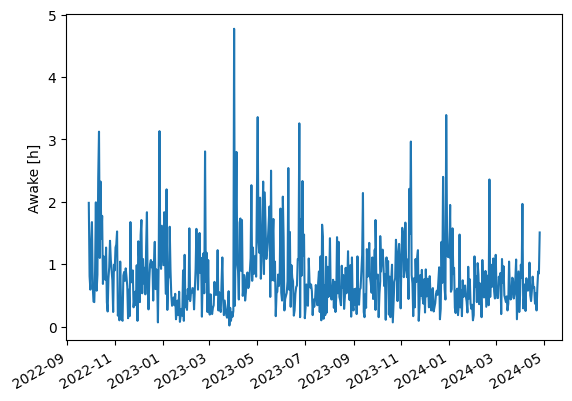

In [115]:
df_group["Awake"].plot()
# df_group["Awake"].tail(15).plot()

plt.ylabel('Awake [h]')

In [21]:
df_group.query("value=='InBed'")["hours"].tail(30).plot()
plt.ylabel('Awake [h]')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Axes: xlabel='creationDate'>

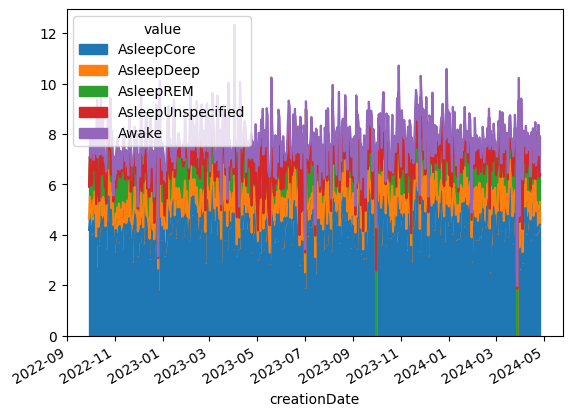

In [52]:
# df_group.tail(200).plot.area()
df_group.plot.area()

In [123]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 560 entries, 2022-09-29 to 2024-04-25
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AsleepCore         558 non-null    float64
 1   AsleepDeep         558 non-null    float64
 2   AsleepREM          558 non-null    float64
 3   AsleepUnspecified  2 non-null      float64
 4   Awake              560 non-null    float64
dtypes: float64(5)
memory usage: 26.2 KB


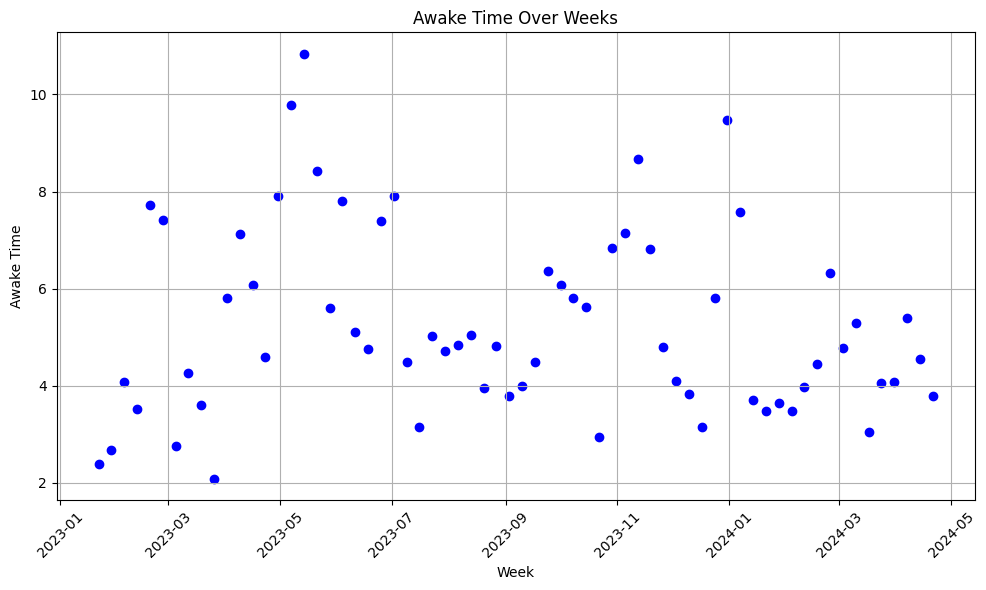

In [125]:
weekly_data = df_group['Awake'].resample('W').sum()

# Step 2: Filter the resampled data by start and end date
start_date = '2023-1-20'  # Specify your start date
end_date = '2024-04-25'    # Specify your end date
filtered_data = weekly_data.loc[start_date:end_date]

# Step 3: Plot as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data.index, filtered_data.values, color='blue')
plt.title('Awake Time Over Weeks')
plt.xlabel('Week')
plt.ylabel('Awake Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

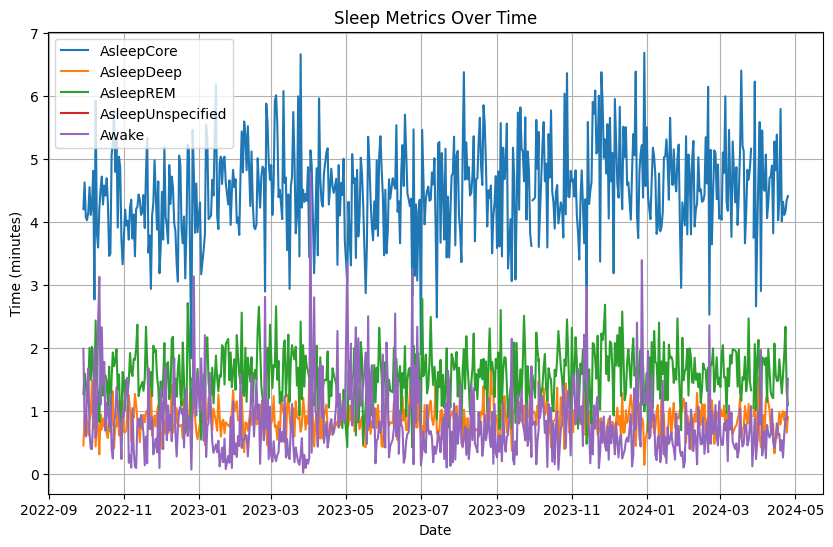

In [130]:
# 1. Time Series Plot
plt.figure(figsize=(10, 6))
for column in df_group.columns:
    plt.plot(df_group.index, df_group[column], label=column)
plt.title('Sleep Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

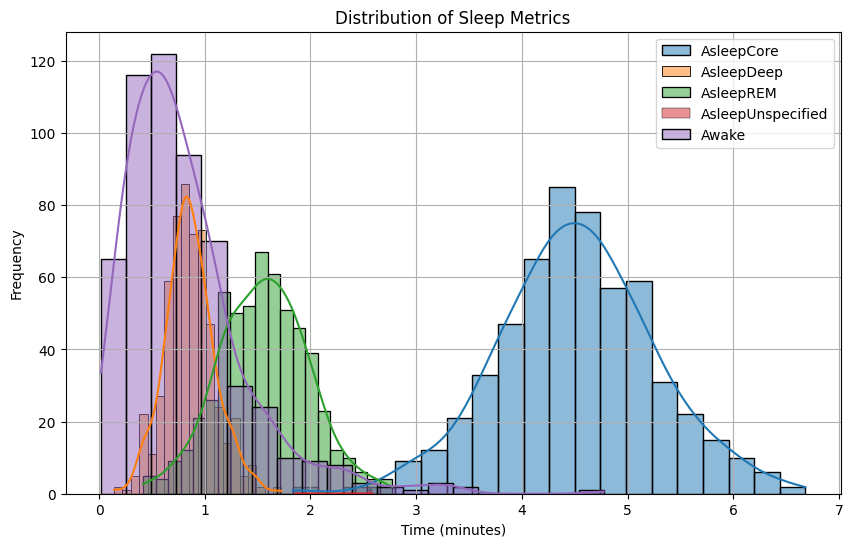

In [131]:
# 2. Histogram and Density Plot
plt.figure(figsize=(10, 6))
for column in df_group.columns:
    sns.histplot(df_group[column], bins=20, kde=True, label=column)
plt.title('Distribution of Sleep Metrics')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

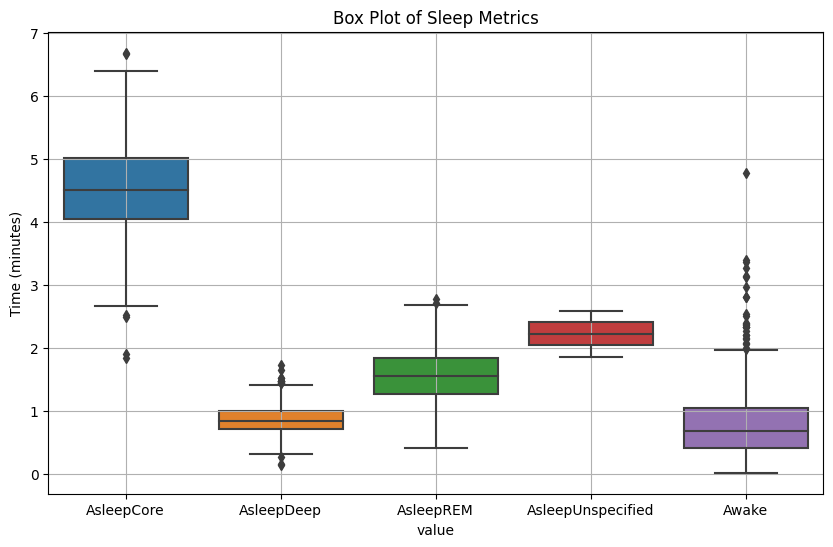

In [132]:
# 3. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_group)
plt.title('Box Plot of Sleep Metrics')
plt.ylabel('Time (minutes)')
plt.grid(True)
plt.show()


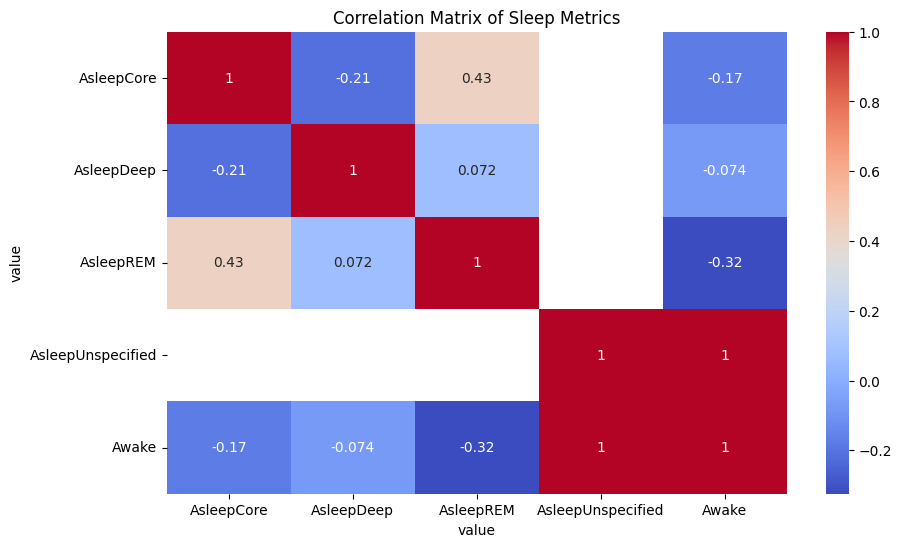

In [133]:
# 4. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_group.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sleep Metrics')
plt.show()

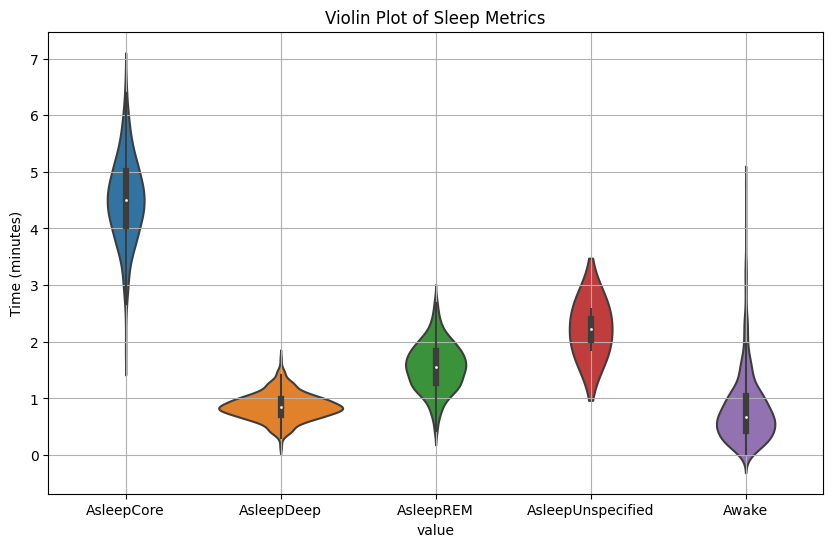

In [134]:

# 5. Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_group)
plt.title('Violin Plot of Sleep Metrics')
plt.ylabel('Time (minutes)')
plt.grid(True)
plt.show()

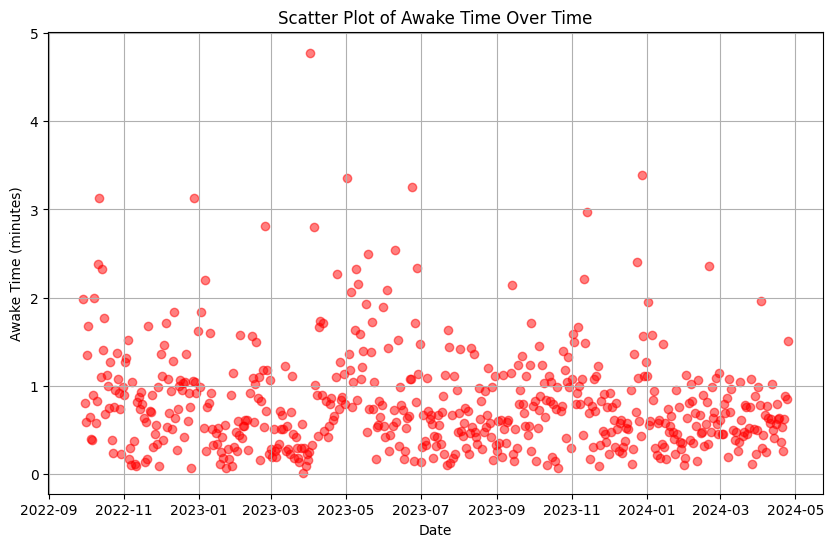

In [138]:
# 6. Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_group.index, df_group['Awake'], color='red',alpha=0.5)
plt.title('Scatter Plot of Awake Time Over Time')
plt.xlabel('Date')
plt.ylabel('Awake Time (minutes)')
plt.grid(True)
plt.show()

In [136]:

import plotly.graph_objects as go


# 7. Interactive Visualization (Plotly)
fig = go.Figure()
for column in df_group.columns:
    fig.add_trace(go.Scatter(x=df_group.index, y=df_group[column], mode='lines', name=column))
fig.update_layout(title='Interactive Time Series Plot of Sleep Metrics',
                  xaxis_title='Date',
                  yaxis_title='Time (minutes)',
                  xaxis=dict(type='date'))
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Calmap

In [23]:
import calmap

In [53]:
df_group.index=pd.to_datetime(df_group.index.date)

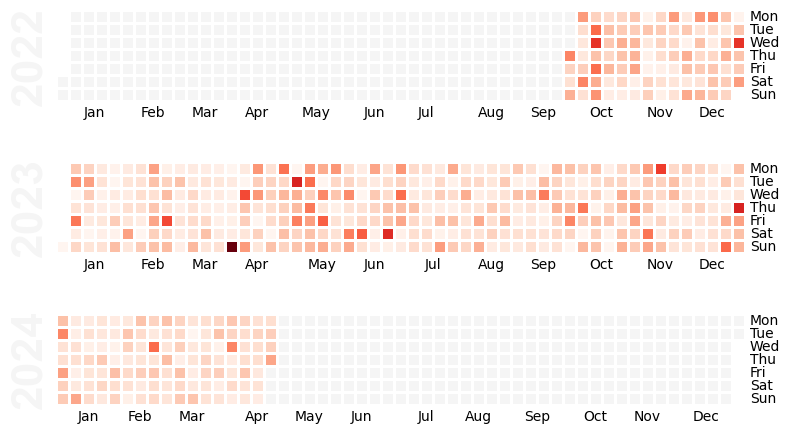

In [54]:
# Create the calendar heatmap
fig, ax = calmap.calendarplot(df_group['Awake'], fig_kws={'figsize':(8,5)}, monthticks=2)

# Set the title and axis labels
# ax.set_title('Calendar Heatmap')
# ax.set_xlabel('Month')
# ax.set_ylabel('Day')

# Show the plot
plt.show()

TypeError: cannot unpack non-iterable Axes object

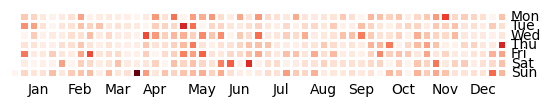

In [55]:
fig, ax = calmap.yearplot(df_group['Awake'], year=2023)

# # Set the title and axis labels
# ax.set_title('Calendar Heatmap')
# ax.set_xlabel('Month')
# ax.set_ylabel('Day')

# Show the plot
plt.show()

<Axes: >

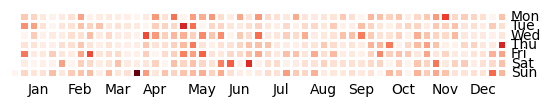

In [56]:
calmap.yearplot(df_group['Awake'], year=2023)

In [ ]:
df_group.index

In [30]:
all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

<Axes: >

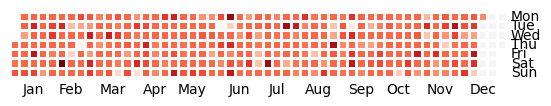

In [31]:
calmap.yearplot(events, year=2015)

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: ylabel='2014'>, <Axes: ylabel='2015'>], dtype=object))

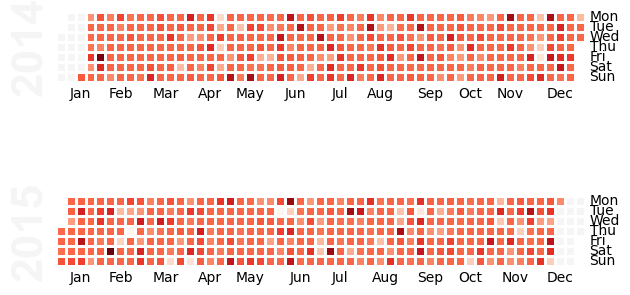

In [33]:
calmap.calendarplot(events)

In [34]:
events

2014-05-02   -1.041479
2015-06-01   -0.139216
2014-03-29   -0.836789
2014-10-16    1.165631
2015-09-17   -0.919992
                ...   
2014-08-19   -1.727006
2014-01-20    0.684452
2014-12-20    0.295558
2014-11-09    0.585497
2014-05-06   -2.040961
Length: 500, dtype: float64

# Load Workout Data 

In [84]:
root.

<Element 'HealthData' at 0x34c146d40>

In [81]:
workout_list = [x.attrib for x in root.iter('Workout')]

# create DataFrame
workout_data = pd.DataFrame(workout_list)
workout_data['workoutActivityType'] = workout_data['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
workout_data = workout_data.rename({"workoutActivityType": "Type"}, axis=1)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    workout_data[col] = pd.to_datetime(workout_data[col])

# convert string to numeric   
workout_data['duration'] = pd.to_numeric(workout_data['duration'])
# workout_data['totalEnergyBurned'] = pd.to_numeric(workout_data['totalEnergyBurned'])
# workout_data['totalDistance'] = pd.to_numeric(workout_data['totalDistance'])
workout_data.tail()

,Type,duration,durationUnit,sourceName,sourceVersion,device,creationDate,startDate,endDate
272,Archery,46.221921,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-09 21:26:23+02:00,2024-04-09 20:40:07+02:00,2024-04-09 21:26:20+02:00
273,Archery,42.694153,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-11 19:16:02+02:00,2024-04-11 18:33:18+02:00,2024-04-11 19:15:59+02:00
274,Archery,128.438514,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-13 12:21:36+02:00,2024-04-13 10:04:44+02:00,2024-04-13 12:21:30+02:00
275,Archery,62.053698,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-20 15:56:36+02:00,2024-04-20 14:54:29+02:00,2024-04-20 15:56:32+02:00
276,Archery,49.355540,min,Premchanok’s Apple Watch,10.3.1,"<<HKDevice: 0x302bcd450>, name:Apple Watch, ma...",2024-04-24 18:22:46+02:00,2024-04-24 17:33:22+02:00,2024-04-24 18:22:43+02:00


In [83]:
workout_data.Type.value_counts()

Type
Cycling    188
Walking     52
Archery     27
Running     10
Name: count, dtype: int64